<a href="https://colab.research.google.com/github/NovitaDian20/PT-Bantu-Usaha-Bangsa-Prediction-/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means Clustering Algorithm

## Studi Kasus

Data yang anda miliki adalah sebagai berikut :
#
KODE= Kode Produk
NAMA= Nama Produk
QTY = Jumlah Terjual
HARGA= Harga Jual
DISC %= Discount persen
DISC(Rp)= Discount harga
SHELF LIFE= Masa penyimpanan dalam bulan


## Import Libraries and Data

In [ ]:
# connect colab ke g drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# import package
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Package untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Membuat path untuk mengidentifikasi letak directory
# Catatan : pastikan path yang anda masukkan sesuai dengan directory data anda. Kemungkinan besar path di contoh ini berbeda dengan penyimpanan data anda
path1 = '/content/gdrive/MyDrive/MAGANG/'

# Cek directory
os.listdir(path1)

['DATA CUST. INVOICE 2018-2021.xlsx',
 'Case Study Magang - Prima Print.pdf',
 'data_magang.xlsx',
 'Magang.ipynb',
 'Primaprint 2021.10 v2.xlsx',
 'Transformed.xlsx',
 'Magang non rokok.ipynb',
 'Dataset.csv',
 'Dataset_fix.csv',
 'Finalprojectguidance (1).ipynb',
 'KLASA.ipynb']

In [ ]:
#DATA CLUSTER JAGA"(supaya ketika data terubah banyak dan kita mau mengembalikan tinggal ganti var)
customer = pd.read_csv(os.path.join(path1, "Dataset_fix.csv"))
customer

,Unnamed: 0,Unnamed: 0.1,business_id,business_created_at,business_category,trans_id,trans_date,report_type,amount,product_name,price,transaction_quantity,Location,Revenue,amount_stand
0,0,0,56459,4/28/2021 16:02,"Butik, Pakaian & Aksesoris",420694,6/1/2021 4:43,income,9000.0,pangkas rambut dewasa,9000.0,1,Tangerang,9000.0,-0.091573
1,1,1,56459,4/28/2021 16:02,"Butik, Pakaian & Aksesoris",420743,6/1/2021 5:03,income,9000.0,pangkas rambut dewasa,9000.0,1,Tangerang,9000.0,-0.091573
2,2,2,56459,4/28/2021 16:02,"Butik, Pakaian & Aksesoris",421076,6/1/2021 8:57,income,9000.0,pangkas rambut dewasa,9000.0,1,Tangerang,9000.0,-0.091573
3,3,3,56459,4/28/2021 16:02,"Butik, Pakaian & Aksesoris",421109,6/1/2021 9:50,income,9000.0,pangkas rambut dewasa,9000.0,1,Tangerang,9000.0,-0.091573
4,4,4,56459,4/28/2021 16:02,"Butik, Pakaian & Aksesoris",421137,6/1/2021 10:12,income,9000.0,pangkas rambut dewasa,9000.0,1,Tangerang,9000.0,-0.091573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208028,227746,227746,62286,8/13/2021 16:07,Lainnya,509223,8/13/2021 16:27,other_income,1200000.0,PVI SJ1-15,600000.0,2,Singapore,1200000.0,0.010515
208029,227747,227747,63045,8/27/2021 10:21,Lainnya,527159,8/29/2021 21:34,other_income,10000.0,Puls,10000.0,1,Singapore,10000.0,-0.091487
208030,227748,227748,64894,9/30/2021 12:49,Restoran,567466,9/30/2021 12:57,expense,6000.0,Ayam Tulang Lunak,10000.0,1,Bandung,10000.0,-0.091830
208031,227793,227793,59274,6/25/2021 10:11,Kesehatan & Kecantikan,447836,6/25/2021 10:17,income,18000.0,Myway1,10000.0,1,Yogyakarta,10000.0,-0.090802


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208033 entries, 0 to 208032
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            208033 non-null  int64  
 1   Unnamed: 0.1          208033 non-null  int64  
 2   business_id           208033 non-null  int64  
 3   business_created_at   208033 non-null  object 
 4   business_category     173755 non-null  object 
 5   trans_id              208033 non-null  int64  
 6   trans_date            208033 non-null  object 
 7   report_type           208033 non-null  object 
 8   amount                208033 non-null  float64
 9   product_name          208033 non-null  object 
 10  price                 208033 non-null  float64
 11  transaction_quantity  208033 non-null  int64  
 12  Location              197634 non-null  object 
 13  Revenue               208033 non-null  float64
 14  amount_stand          208033 non-null  float64
dtype

#DICARI DATA YG UNIK MENGGUNAKAN KODE

In [ ]:
customer.describe()

,Unnamed: 0,Unnamed: 0.1,business_id,trans_id,amount,price,transaction_quantity,Revenue,amount_stand
count,208033.000000,208033.000000,208033.000000,208033.000000,2.080330e+05,2.080330e+05,2.080330e+05,2.080330e+05,2.080330e+05
mean,112425.071075,112425.071075,50273.881961,505531.170127,1.077325e+06,6.445118e+04,7.468866e+01,5.414609e+05,4.523671e-16
std,64531.470984,64531.470984,12705.952545,48373.366007,1.166635e+07,2.142812e+06,1.850034e+04,1.452341e+08,1.000000e+00
min,0.000000,0.000000,408.000000,420393.000000,1.000000e+00,7.700000e-01,1.000000e+00,7.700000e-01,-9.234453e-02
25%,57825.000000,57825.000000,43955.000000,464175.000000,8.200000e+04,1.000000e+04,1.000000e+00,1.770000e+04,-8.531585e-02
50%,111914.000000,111914.000000,56041.000000,506324.000000,2.350000e+05,2.100000e+04,1.000000e+00,4.000000e+04,-7.220121e-02
75%,167929.000000,167929.000000,59577.000000,546740.000000,8.460000e+05,4.900000e+04,3.000000e+00,9.900000e+04,-1.982836e-02
max,227794.000000,227794.000000,65811.000000,589050.000000,3.447120e+09,4.308900e+08,8.374000e+06,6.602062e+10,2.953831e+02


In [ ]:
#categorical.to_excel('/content/gdrive/MyDrive/Intermediate 4/Categorical.xlsx',index=False)

> **Dalam materi ini, data preprocessing seperti cek missing value, duplicate data, data type tidak akan dilakukan, karena fokus dari materi adalah pada clustering. Anda dapat membuka kembali materi sebelumnya dan menerapkankan sendiri dalam materi ini jika ingin menganalisis secara lengkap.**

## Exploratory Data Analysis (EDA)

In [ ]:
#customer_data['HARGA']=customer_data['HARGA'].astype(float)

In [ ]:
#customer_data['DISC (Rp)']=customer_data['DISC (Rp)'].astype(float)

In [ ]:
#customer_data.info()

In [ ]:
#customer_data[0:1000]

In [ ]:
#customer_data[customer_data["KODE"].duplicated(keep=False)]

#analisis data "TER.."

In [ ]:
#Jumlah penjualan terbanyak 
#customer_data_qty_highest = customer_data.sort_values('QTY', ascending=False)
#customer_data_qty_highest[0:10]

In [ ]:
#Jumlah penjualan tersedikit
#customer_data_qty_lowest = customer_data.sort_values('QTY', ascending=True)
#customer_data_qty_lowest[0:10]

In [ ]:
#customer.info()



disini ada yg unik INDOMI AYAM  QTY ==0 , karena ditemukan 4 data INDOMI AYAM SPC/CR yg apabila ditambah akan menghasilkan nilai 0, hal ini tidak banyak mempengaruhi data sehingga dibiarkan

In [ ]:
#Waktu ketahan produk yang lama menurut SHELF LIFE
#customer_data_shelflife_highest = customer_data.sort_values('SHELF LIFE', ascending=False)
#customer_data_shelflife_highest[0:10]

In [ ]:
#Waktu ketahan produk yang singkat menurut SHELF LIFE
#customer_data_shelflife_lowest = customer_data.sort_values('SHELF LIFE', ascending=True)
#customer_data_shelflife_lowest[0:10]

In [ ]:
#customer_data_discpersent_highest = customer_data.sort_values('DISC (%)', ascending=False)
#customer_data_discpersent_highest[0:10]

diskon terbesarpun, produknya tidak masuk dalam 10 daftar penjualan terbanyak. sehingga diskon mungkin tidak signifikan dalam mempengaruhi jumlah penjualan.

In [ ]:
#HARGA produk yang tinggi
#customer_data_harga_highest = customer_data.sort_values('HARGA', ascending=False)
#customer_data_harga_highest[0:10]

In [ ]:
#customer_data

In [ ]:
dari analisa manual, kita bisa lihat bahwa untuk restock produk harus memiliki QTY yang besar namun SHELF LIFE singkat

In [ ]:
#ANGKA YANG DIJADIKAN KONDISIONAL DIPEROLEH DARI RATA" QTY DAN SHELF LIFE YG DIHITUNG DIBAWAH
#data_produk=customer_data[(customer_data['QTY']>=1.400)&(customer_data['SHELF LIFE']<=21)]
#data_produk

In [ ]:
data_produk_qty_highest.to_excel('/content/gdrive/MyDrive/Intermediate 4/data_produk_asumsi_penjualantinggi.xlsx',index=False)

In [ ]:
customer.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'business_id', 'business_created_at',
       'business_category', 'trans_id', 'trans_date', 'report_type', 'amount',
       'product_name', 'price', 'transaction_quantity', 'Location', 'Revenue',
       'amount_stand'],
      dtype='object')

In [ ]:
customer.drop(customer[(customer.business_category !='Toko Kelontong & Retail')&(customer.business_category !='Lainnya')&(customer.business_category !='Roti, Kue, Camilan')&(customer.business_category !='Butik, Pakaian & Aksesoris')& (customer.business_category !='Makanan Segar')].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


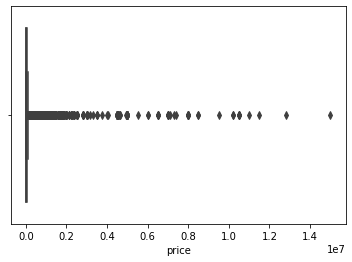

In [ ]:
#persebaran harga produk
sns.boxplot(customer["price"])

In [ ]:
customer.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'business_id', 'business_created_at',
       'business_category', 'trans_id', 'trans_date', 'report_type', 'amount',
       'product_name', 'price', 'transaction_quantity', 'Location', 'Revenue',
       'amount_stand'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


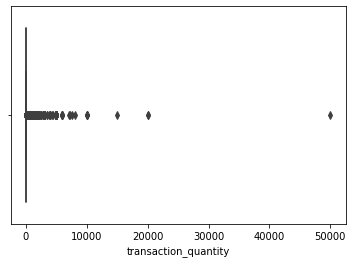

In [ ]:
#persebaran harga produk
sns.boxplot(customer["transaction_quantity"])

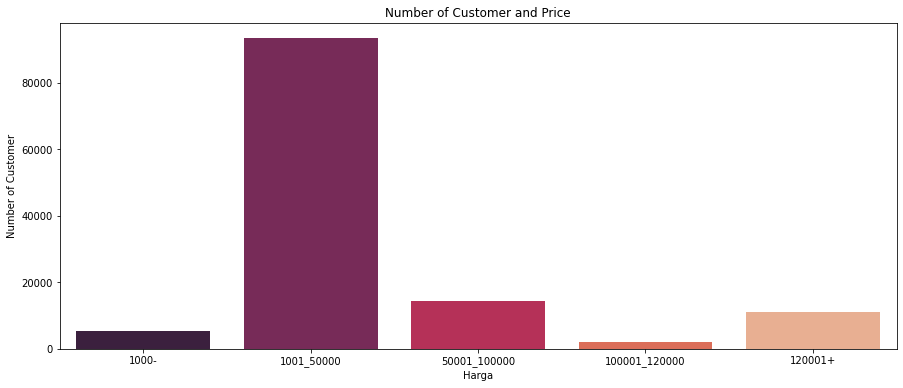

In [ ]:
# Menggolongkan harga dan melihat persebarannya dalam data
harga1000below = customer.price[customer.price <= 1000]
harga1001_50000 = customer.price[(customer.price <= 50000) & (customer.price >= 1001)]
harga50001_100000 = customer.price[(customer.price <= 100000) & (customer.price >= 50001)]
harga100001_120000= customer.price[(customer.price <= 120000) & (customer.price >= 100001)]
harga120001above = customer.price[customer.price >= 120001]

x = ["1000-","1001_50000","50001_100000","100001_120000","120001+"]
y = [len(harga1000below.values),len(harga1001_50000.values),len(harga50001_100000.values),len(harga100001_120000.values),len(harga120001above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Price")
plt.xlabel("Harga")
plt.ylabel("Number of Customer")
plt.show()

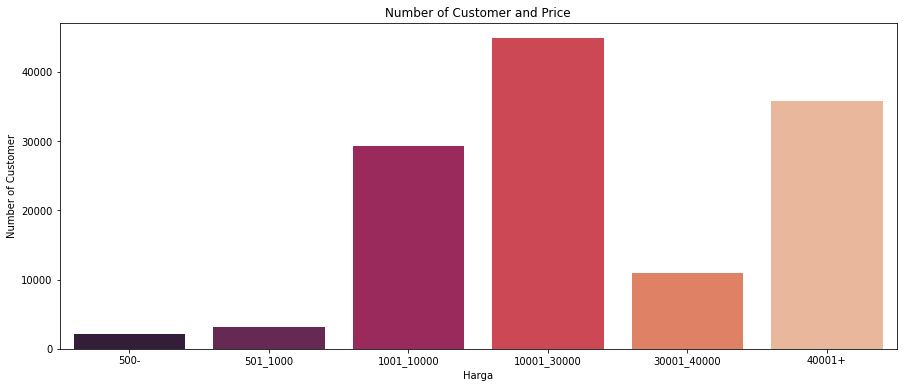

In [ ]:
# Menggolongkan usia dan melihat persebarannya dalam data
harga500below = customer.price[customer.price <= 500]
harga501_1000 = customer.price[(customer.price <= 1000) & (customer.price >=501)]
harga1001_10000 = customer.price[(customer.price <= 10000) & (customer.price >= 1001)]
harga10001_30000= customer.price[(customer.price <= 30000) & (customer.price >= 10001)]
harga30001_40000 = customer.price[(customer.price <= 40000) & (customer.price >= 30001)]
harga40001above =customer.price[customer.price >= 40001]
x = ["500-","501_1000","1001_10000","10001_30000","30001_40000", "40001+"]
y = [len(harga500below.values),len(harga501_1000.values),len(harga1001_10000.values),len(harga10001_30000.values),len(harga30001_40000.values), len(harga40001above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Price")
plt.xlabel("Harga")
plt.ylabel("Number of Customer")
plt.show()

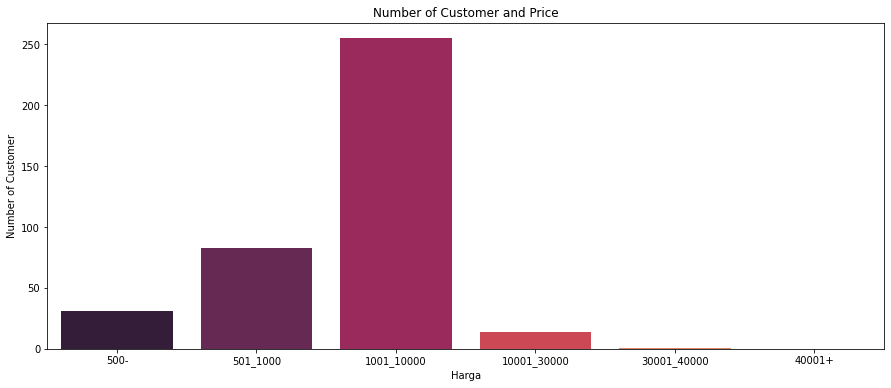

In [ ]:
# Menggolongkan usia dan melihat persebarannya dalam data_produk
harga500below = data_produk.HARGA[data_produk.HARGA <= 500]
harga501_1000 = data_produk.HARGA[(data_produk.HARGA <= 1000) & (data_produk.HARGA >=501)]
harga1001_10000 = data_produk.HARGA[(data_produk.HARGA <= 10000) & (data_produk.HARGA >= 1001)]
harga10001_30000= data_produk.HARGA[(data_produk.HARGA <= 30000) & (data_produk.HARGA >= 10001)]
harga30001_40000 = data_produk.HARGA[(data_produk.HARGA <= 40000) & (data_produk.HARGA >= 30001)]
harga40001above =data_produk.HARGA[data_produk.HARGA >= 40001]
x = ["500-","501_1000","1001_10000","10001_30000","30001_40000", "40001+"]
y = [len(harga500below.values),len(harga501_1000.values),len(harga1001_10000.values),len(harga10001_30000.values),len(harga30001_40000.values), len(harga40001above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Price")
plt.xlabel("Harga")
plt.ylabel("Number of Customer")
plt.show()

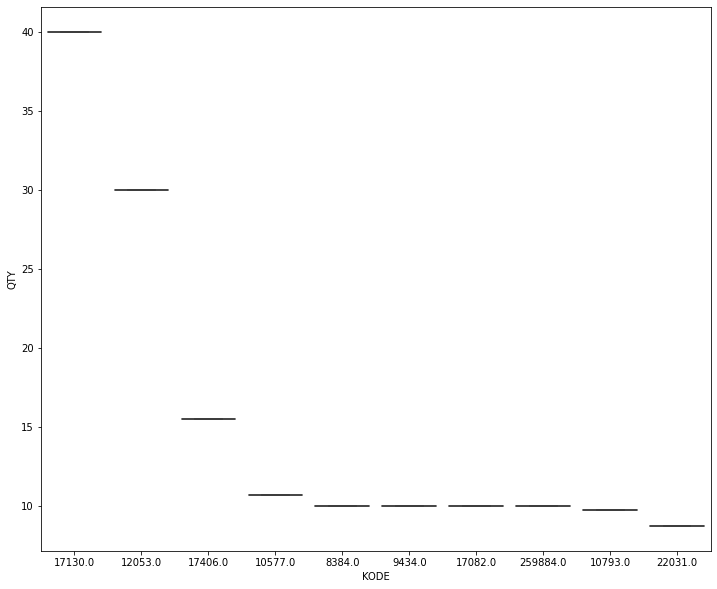

In [ ]:
# Persebaran KODE and QTY
plt.figure(figsize=(12,10))
sns.boxplot(x=data_produk_qty_highest[0:10]['KODE'], y=data_produk_qty_highest[0:10]["QTY"], data=data_produk_qty_highest[0:10])
plt.show()

In [ ]:
data_produk_qty_highest[0:10]

,,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
KODE,NAMA,,,,,,
17130,INDOMI KARI AYAM,17130.0,40.000000,935.0,0.0,0.0,10.000000
12053,ALPENLI-LOLLI STRAWB,12053.0,30.000000,390.0,0.0,0.0,12.000000
17406,SELERA RAK.BASO,17406.0,15.500000,500.0,0.0,0.0,21.000000
10577,MIO MIO STICK 18 GR,10577.0,10.666667,445.0,0.0,0.0,15.666667
8384,POCI BIRU 40/KCL,8384.0,10.000000,1190.0,0.0,0.0,10.000000
9434,SAJIKU GORENG UDANG,9434.0,10.000000,1190.0,0.0,0.0,13.000000
17082,GAGA MI 100 AYAM BWG,17082.0,10.000000,880.0,0.0,0.0,19.000000
259884,SDK ES 320 /WJY,259884.0,10.000000,900.0,0.0,0.0,15.000000
10793,MIO WF VAN 18 GR,10793.0,9.750000,410.0,0.0,0.0,20.500000


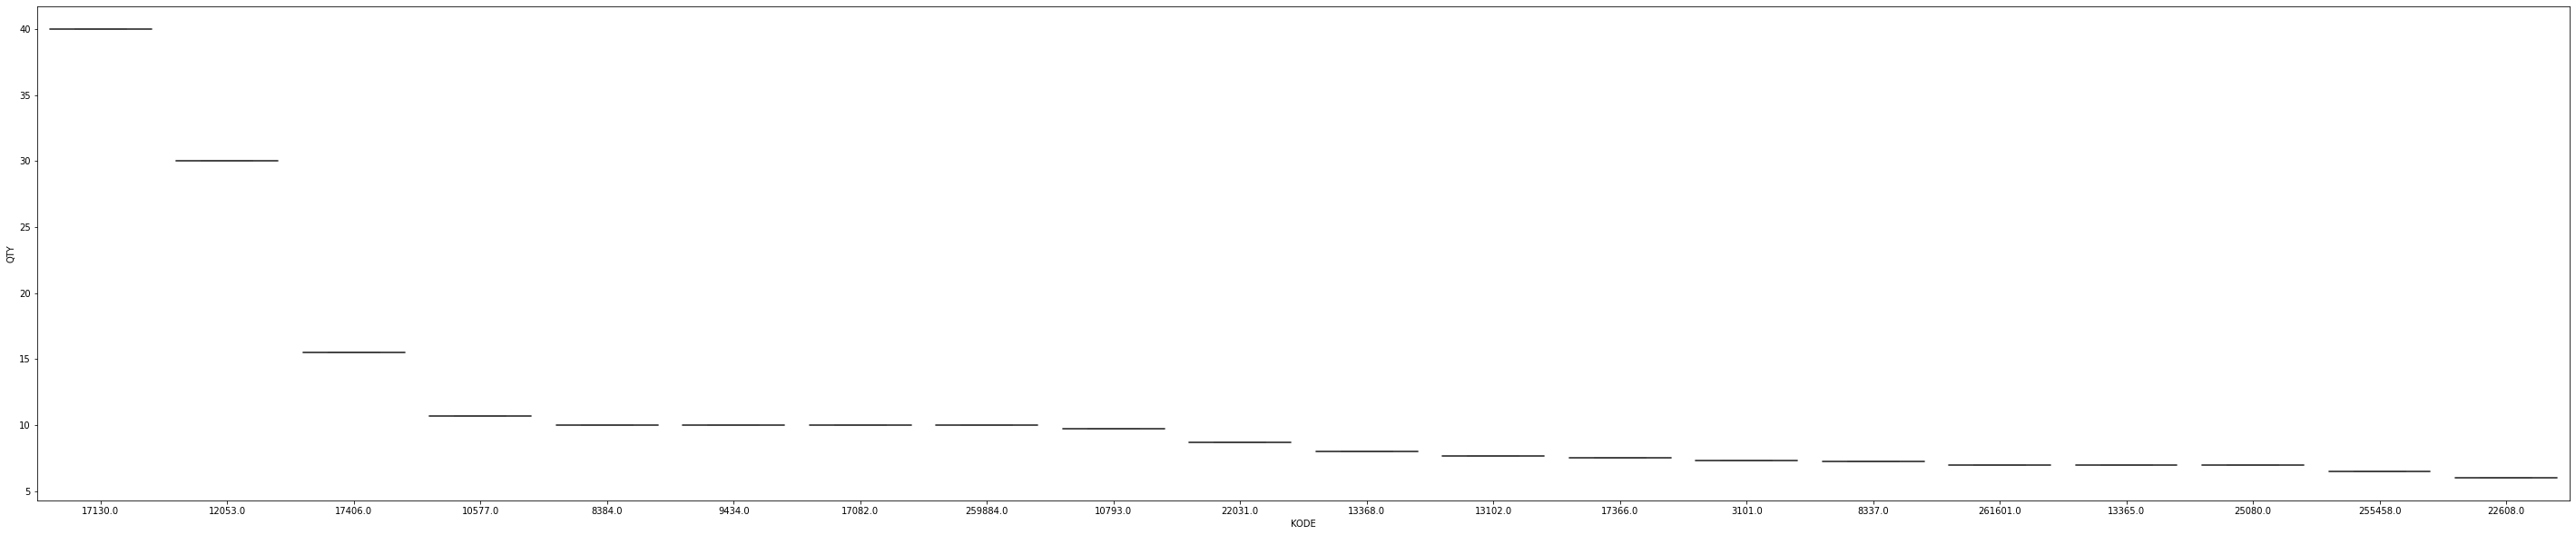

In [ ]:
# Persebaran KODE and QTY
plt.figure(figsize=(50,10))
sns.boxplot(x=data_produk_qty_highest["KODE"][0:20], y=data_produk_qty_highest["QTY"][0:20], data=data_produk_qty_highest[0:50])
plt.show()



```
karena tidak terlihat, data tidak terbaca, harus mengkatorikan lebih singkat lagi
```



======================================================
MASUK KE CATEGORY

In [ ]:
for col in categorical:
    plt.figure(figsize=(20,8))
    sns.countplot(x=col, data=customer)
    plt.tight_layout()

NameError: ignored

## Data Preprocessing

### Encode Categorical

In [ ]:
#DATA ASLI 
customer_data

In [ ]:
#DATA SAMPEL YANG DIASUMISKAN AKAN DI RESTOCK
data_produk_qty_highest

,,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
KODE,NAMA,,,,,,
17130,INDOMI KARI AYAM,17130.0,40.000000,935.0,0.0,0.0,10.000000
12053,ALPENLI-LOLLI STRAWB,12053.0,30.000000,390.0,0.0,0.0,12.000000
17406,SELERA RAK.BASO,17406.0,15.500000,500.0,0.0,0.0,21.000000
10577,MIO MIO STICK 18 GR,10577.0,10.666667,445.0,0.0,0.0,15.666667
8384,POCI BIRU 40/KCL,8384.0,10.000000,1190.0,0.0,0.0,10.000000
...,...,...,...,...,...,...,...
100252,SURF 40x6's LIME FRS,100252.0,1.400000,2370.0,0.0,0.0,19.400000
68629,DREAM HNY SOAP 80,68629.0,1.400000,1765.0,0.0,0.0,20.000000
3006,DANCOW INST BOX 200,3006.0,1.400000,9160.0,0.0,0.0,18.800000


In [ ]:
data_produk_qty_highest.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 384 entries, (17130, 'INDOMI KARI AYAM') to (1006, 'DANCOW BLT MD 1+ 400')
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KODE        384 non-null    object 
 1   QTY         384 non-null    float64
 2   HARGA       384 non-null    float64
 3   DISC (%)    384 non-null    float64
 4   DISC (Rp)   384 non-null    float64
 5   SHELF LIFE  384 non-null    float64
dtypes: float64(5), object(1)
memory usage: 243.9+ KB


In [ ]:
customer_data['KODE'] = customer_data['KODE'].astype(str)

In [ ]:
customer.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'business_id', 'business_created_at',
       'business_category', 'trans_id', 'trans_date', 'report_type', 'amount',
       'product_name', 'price', 'transaction_quantity', 'Location', 'Revenue',
       'amount_stand'],
      dtype='object')

============================================DATA KLASA==========================

In [ ]:
# Merubah data kategori menjadi numerik
label_encoder = LabelEncoder()
encoded_data = customer[['business_id']].apply(label_encoder.fit_transform)

# Menggabungkan kolom umur dan nilai belanja setahun dengan data kategori
cluster_data = pd.concat([encoded_data, customer[["business_id","business_category","product_name","transaction_quantity","trans_id", "amount", "price", "Revenue"]]], axis=1)

cluster_data.head()

,business_id,business_id,business_category,product_name,transaction_quantity,trans_id,amount,price,Revenue
0,232,56459,"Butik, Pakaian & Aksesoris",pangkas rambut dewasa,1,420694,9000.0,9000.0,9000.0
1,232,56459,"Butik, Pakaian & Aksesoris",pangkas rambut dewasa,1,420743,9000.0,9000.0,9000.0
2,232,56459,"Butik, Pakaian & Aksesoris",pangkas rambut dewasa,1,421076,9000.0,9000.0,9000.0
3,232,56459,"Butik, Pakaian & Aksesoris",pangkas rambut dewasa,1,421109,9000.0,9000.0,9000.0
4,232,56459,"Butik, Pakaian & Aksesoris",pangkas rambut dewasa,1,421137,9000.0,9000.0,9000.0


### Features Selection
Dalam proses ini akan dipilih variabel yang memiliki pengaruh besar dalam penentuan cluster data.

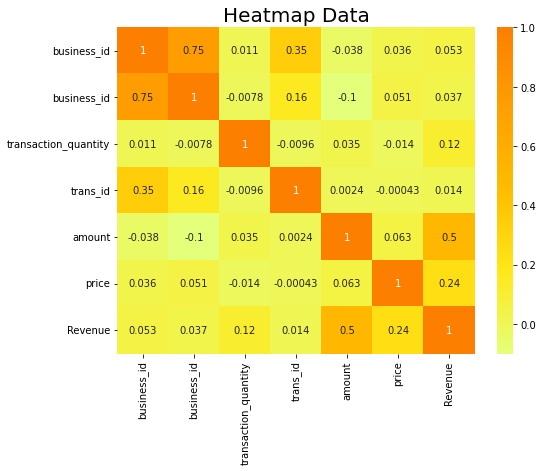

In [ ]:
# Features Selection
plt.figure(figsize=(8,6))
sns.heatmap(cluster_data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap Data', fontsize = 20)
plt.show()

In [ ]:
#qty-harga, harga-diskon(Rp), diskon(Rp)-self life

### Scaling Data
Dalam clustering penggunaan scaling data juga diperlukan, hal ini akan membantu mengatasi permasalahan gap pada tiap kolom.

In [ ]:
# Data Scaling
scaler = StandardScaler()
cluster_data[["transaction_quantity","trans_id", "amount", "price", "Revenue"]]=scaler.fit_transform(cluster_data[["transaction_quantity","trans_id", "amount", "price", "Revenue"]])
cluster_data.head()

,business_id,business_id,business_category,product_name,transaction_quantity,trans_id,amount,price,Revenue
0,232,56459,"Butik, Pakaian & Aksesoris",pangkas rambut dewasa,-0.062882,-1.762542,-0.21924,-0.211266,-0.147469
1,232,56459,"Butik, Pakaian & Aksesoris",pangkas rambut dewasa,-0.062882,-1.761518,-0.21924,-0.211266,-0.147469
2,232,56459,"Butik, Pakaian & Aksesoris",pangkas rambut dewasa,-0.062882,-1.754563,-0.21924,-0.211266,-0.147469
3,232,56459,"Butik, Pakaian & Aksesoris",pangkas rambut dewasa,-0.062882,-1.753873,-0.21924,-0.211266,-0.147469
4,232,56459,"Butik, Pakaian & Aksesoris",pangkas rambut dewasa,-0.062882,-1.753288,-0.21924,-0.211266,-0.147469


In [ ]:
cluster_data = cluster_data.drop(["business_category"], axis = 1)
cluster_data.head()

,business_id,business_id,product_name,transaction_quantity,trans_id,amount,price,Revenue
0,232,56459,pangkas rambut dewasa,-0.062882,-1.762542,-0.21924,-0.211266,-0.147469
1,232,56459,pangkas rambut dewasa,-0.062882,-1.761518,-0.21924,-0.211266,-0.147469
2,232,56459,pangkas rambut dewasa,-0.062882,-1.754563,-0.21924,-0.211266,-0.147469
3,232,56459,pangkas rambut dewasa,-0.062882,-1.753873,-0.21924,-0.211266,-0.147469
4,232,56459,pangkas rambut dewasa,-0.062882,-1.753288,-0.21924,-0.211266,-0.147469


In [ ]:
cluster_data = cluster_data.drop(["product_name"], axis = 1)
cluster_data.head()

,business_id,business_id,transaction_quantity,trans_id,amount,price,Revenue
0,232,56459,-0.062882,-1.762542,-0.21924,-0.211266,-0.147469
1,232,56459,-0.062882,-1.761518,-0.21924,-0.211266,-0.147469
2,232,56459,-0.062882,-1.754563,-0.21924,-0.211266,-0.147469
3,232,56459,-0.062882,-1.753873,-0.21924,-0.211266,-0.147469
4,232,56459,-0.062882,-1.753288,-0.21924,-0.211266,-0.147469


## KMeans Cluster

In [ ]:
cluster = KMeans(n_clusters=3)
cluster.fit(cluster_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
segment = pd.Series(cluster.labels_, name="segment")

### Menentukan Nilai Optimal K (kelompok)

Akan digunakan metode Elbow untuk menentukan jumlah k optimal.

In [ ]:
# Perulangan ini digunakan untuk mengeksekusi nilai k dengan data 
# Selanjutkan akan dicari SSE

Sum_of_squared_error = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_data)
    Sum_of_squared_error.append(km.inertia_)

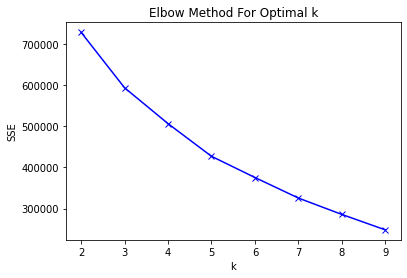

In [ ]:
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

### Evaluation Model

Menggunakan silhouette score untuk konfirmasi k-kluster

In [ ]:
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(cluster_data)
    centers = clusterer.cluster_centers_

    score = silhouette_score(cluster_data, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.32928063477558295
For n_clusters = 3, silhouette score is 0.336594833839735
For n_clusters = 4, silhouette score is 0.35514179346192093
For n_clusters = 5, silhouette score is 0.3551264503406954
For n_clusters = 6, silhouette score is 0.3905336856542711
For n_clusters = 7, silhouette score is 0.3943474029870197
For n_clusters = 8, silhouette score is 0.3924539359015586
For n_clusters = 9, silhouette score is 0.39532744258349395


Dari silhouette model didapat k-kluster yang optimum adalah 2, sama seperti pemilihan cluster dengan elbow method. Oleh karena itu, untuk kedepannya akan digunakan k=2 yang artinya PRODUK akan dibagi kedalam 2 kelompok.

In [ ]:
# Memodelkan data dengan k-means
cluster = KMeans(n_clusters=9)
cluster.fit(cluster_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
segment = pd.Series(cluster.labels_, name="segment")

In [ ]:
# Menggabungkan data dengan hasil cluster
results = pd.concat([customer, segment], axis=1)
results

,Unnamed: 0,Unnamed: 0.1,business_id,business_created_at,business_category,trans_id,trans_date,report_type,amount,product_name,price,transaction_quantity,Location,Revenue,amount_stand,segment
0,0.0,0.0,56459.0,4/28/2021 16:02,"Butik, Pakaian & Aksesoris",420694.0,6/1/2021 4:43,income,9000.0,pangkas rambut dewasa,9000.0,1.0,Tangerang,9000.0,-0.091573,1.0
1,1.0,1.0,56459.0,4/28/2021 16:02,"Butik, Pakaian & Aksesoris",420743.0,6/1/2021 5:03,income,9000.0,pangkas rambut dewasa,9000.0,1.0,Tangerang,9000.0,-0.091573,1.0
2,2.0,2.0,56459.0,4/28/2021 16:02,"Butik, Pakaian & Aksesoris",421076.0,6/1/2021 8:57,income,9000.0,pangkas rambut dewasa,9000.0,1.0,Tangerang,9000.0,-0.091573,1.0
3,3.0,3.0,56459.0,4/28/2021 16:02,"Butik, Pakaian & Aksesoris",421109.0,6/1/2021 9:50,income,9000.0,pangkas rambut dewasa,9000.0,1.0,Tangerang,9000.0,-0.091573,1.0
4,4.0,4.0,56459.0,4/28/2021 16:02,"Butik, Pakaian & Aksesoris",421137.0,6/1/2021 10:12,income,9000.0,pangkas rambut dewasa,9000.0,1.0,Tangerang,9000.0,-0.091573,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208023,227714.0,227714.0,64073.0,9/13/2021 22:41,"Butik, Pakaian & Aksesoris",549192.0,9/16/2021 7:53,expense,48000.0,Hijab Segitiga BellaSquare (Brown Edition),25000.0,1.0,Makassar,25000.0,-0.088230,NaN
208024,227716.0,227716.0,64630.0,9/25/2021 17:41,"Roti, Kue, Camilan",561421.0,9/25/2021 18:19,expense,267000.0,Sosis salam 30,2000.0,1.0,Surabaya,2000.0,-0.069458,NaN
208026,227744.0,227744.0,59549.0,6/30/2021 6:30,Lainnya,453472.0,6/30/2021 6:33,other_income,3000000.0,Bapak Gani,3000000.0,1.0,Singapore,3000000.0,0.164805,NaN
208028,227746.0,227746.0,62286.0,8/13/2021 16:07,Lainnya,509223.0,8/13/2021 16:27,other_income,1200000.0,PVI SJ1-15,600000.0,2.0,Singapore,1200000.0,0.010515,NaN


In [ ]:
# Menampilkan 5 data teratas dari cluster 0
results[results["segment"]==0][:5]

,Unnamed: 0,Unnamed: 0.1,business_id,business_created_at,business_category,trans_id,trans_date,report_type,amount,product_name,price,transaction_quantity,Location,Revenue,amount_stand,segment
849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
# Menampilkan 5 data teratas dari cluster 1
results[results["segment"]==1][:5]

,Unnamed: 0,Unnamed: 0.1,business_id,business_created_at,business_category,trans_id,trans_date,report_type,amount,product_name,price,transaction_quantity,Location,Revenue,amount_stand,segment
0,0.0,0.0,56459.0,4/28/2021 16:02,"Butik, Pakaian & Aksesoris",420694.0,6/1/2021 4:43,income,9000.0,pangkas rambut dewasa,9000.0,1.0,Tangerang,9000.0,-0.091573,1.0
1,1.0,1.0,56459.0,4/28/2021 16:02,"Butik, Pakaian & Aksesoris",420743.0,6/1/2021 5:03,income,9000.0,pangkas rambut dewasa,9000.0,1.0,Tangerang,9000.0,-0.091573,1.0
2,2.0,2.0,56459.0,4/28/2021 16:02,"Butik, Pakaian & Aksesoris",421076.0,6/1/2021 8:57,income,9000.0,pangkas rambut dewasa,9000.0,1.0,Tangerang,9000.0,-0.091573,1.0
3,3.0,3.0,56459.0,4/28/2021 16:02,"Butik, Pakaian & Aksesoris",421109.0,6/1/2021 9:50,income,9000.0,pangkas rambut dewasa,9000.0,1.0,Tangerang,9000.0,-0.091573,1.0
4,4.0,4.0,56459.0,4/28/2021 16:02,"Butik, Pakaian & Aksesoris",421137.0,6/1/2021 10:12,income,9000.0,pangkas rambut dewasa,9000.0,1.0,Tangerang,9000.0,-0.091573,1.0


In [ ]:
# Menampilkan 5 data teratas dari cluster 1
results[results["segment"]==2][10:15]

,Unnamed: 0,Unnamed: 0.1,business_id,business_created_at,business_category,trans_id,trans_date,report_type,amount,product_name,price,transaction_quantity,Location,Revenue,amount_stand,segment
888,891.0,891.0,54857.0,4/2/2021 9:41,Lainnya,448551.0,6/26/2021 3:56,income,300000.0,Sewa Juli 2021 Arif,300000.0,1.0,Singapore,300000.0,-0.066630,2.0
889,892.0,892.0,54857.0,4/2/2021 9:41,Lainnya,450123.0,6/27/2021 12:47,income,300000.0,Sewa Juli Hans,300000.0,1.0,Singapore,300000.0,-0.066630,2.0
890,893.0,893.0,54857.0,4/2/2021 9:41,Lainnya,478828.0,7/19/2021 12:18,income,150000.0,Sewa Juli Arlindi,150000.0,1.0,Singapore,150000.0,-0.079487,2.0
891,894.0,894.0,52858.0,3/3/2021 12:49,Lainnya,448723.0,6/26/2021 7:37,income,150000.0,Inet 150,150000.0,1.0,Semarang,150000.0,-0.079487,2.0
892,895.0,895.0,52858.0,3/3/2021 12:49,Lainnya,448733.0,6/26/2021 7:44,income,150000.0,Inet 150,150000.0,1.0,Semarang,150000.0,-0.079487,2.0


In [ ]:
# Menampilkan 5 data teratas dari cluster 1
results[results["segment"]==3][5:10]

,Unnamed: 0,Unnamed: 0.1,business_id,business_created_at,business_category,trans_id,trans_date,report_type,amount,product_name,price,transaction_quantity,Location,Revenue,amount_stand,segment
106509,114534.0,114534.0,41701.0,11/28/2020 7:31,Toko Kelontong & Retail,493404.0,8/1/2021 8:58,income,155000.0,Mug Regular-ST,35000.0,1.0,Jakarta,35000.0,-0.079059,3.0
106510,114535.0,114535.0,41701.0,11/28/2020 7:31,Toko Kelontong & Retail,493407.0,8/1/2021 9:00,income,370000.0,Dinner Plate ST,50000.0,3.0,Jakarta,150000.0,-0.060629,3.0
106511,114536.0,114536.0,41701.0,11/28/2020 7:31,Toko Kelontong & Retail,493407.0,8/1/2021 9:00,income,370000.0,Med Bowl-stoneware,55000.0,3.0,Jakarta,165000.0,-0.060629,3.0
106512,114537.0,114537.0,41701.0,11/28/2020 7:31,Toko Kelontong & Retail,493407.0,8/1/2021 9:00,income,370000.0,Mug Regular-ST,35000.0,2.0,Jakarta,70000.0,-0.060629,3.0
106513,114538.0,114538.0,41701.0,11/28/2020 7:31,Toko Kelontong & Retail,493439.0,8/1/2021 9:19,income,200000.0,Dinner Plate ST,50000.0,2.0,Jakarta,100000.0,-0.075201,3.0


In [ ]:
# Menampilkan 5 data teratas dari cluster 1
results[results["segment"]==4][20:25]

,Unnamed: 0,Unnamed: 0.1,business_id,business_created_at,business_category,trans_id,trans_date,report_type,amount,product_name,price,transaction_quantity,Location,Revenue,amount_stand,segment
983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0


In [ ]:
# Menampilkan 5 data teratas dari cluster 1
results[results["segment"]==6][15:20]

,Unnamed: 0,Unnamed: 0.1,business_id,business_created_at,business_category,trans_id,trans_date,report_type,amount,product_name,price,transaction_quantity,Location,Revenue,amount_stand,segment
73502,80571.0,80571.0,27209.0,9/23/2020 15:25,Lainnya,499098.0,8/5/2021 13:28,income,3491730.0,Knop Rinnai KW,3000.0,2.0,Singapore,6000.0,0.206955,6.0
73503,80572.0,80572.0,27209.0,9/23/2020 15:25,Lainnya,499098.0,8/5/2021 13:28,income,3491730.0,Knop Quantum Umum Hitam KW,2100.0,2.0,Singapore,4200.0,0.206955,6.0
73504,80573.0,80573.0,27209.0,9/23/2020 15:25,Lainnya,499098.0,8/5/2021 13:28,income,3491730.0,Knop Quantum Putih Panjang,6500.0,1.0,Singapore,6500.0,0.206955,6.0
73506,80575.0,80575.0,27209.0,9/23/2020 15:25,Lainnya,499098.0,8/5/2021 13:28,income,3491730.0,Knop Winn RRT,3500.0,2.0,Singapore,7000.0,0.206955,6.0
73507,80576.0,80576.0,27209.0,9/23/2020 15:25,Lainnya,499098.0,8/5/2021 13:28,income,3491730.0,Knop Setrika Philips,8000.0,4.0,Singapore,32000.0,0.206955,6.0


## EDA CLUSTER



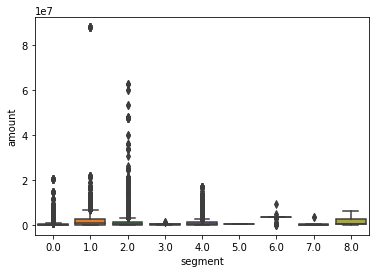

In [ ]:
# Pengelompokan customer berdasarkan usia
sns.boxplot(x=results["segment"], y=results["amount"], data=results)

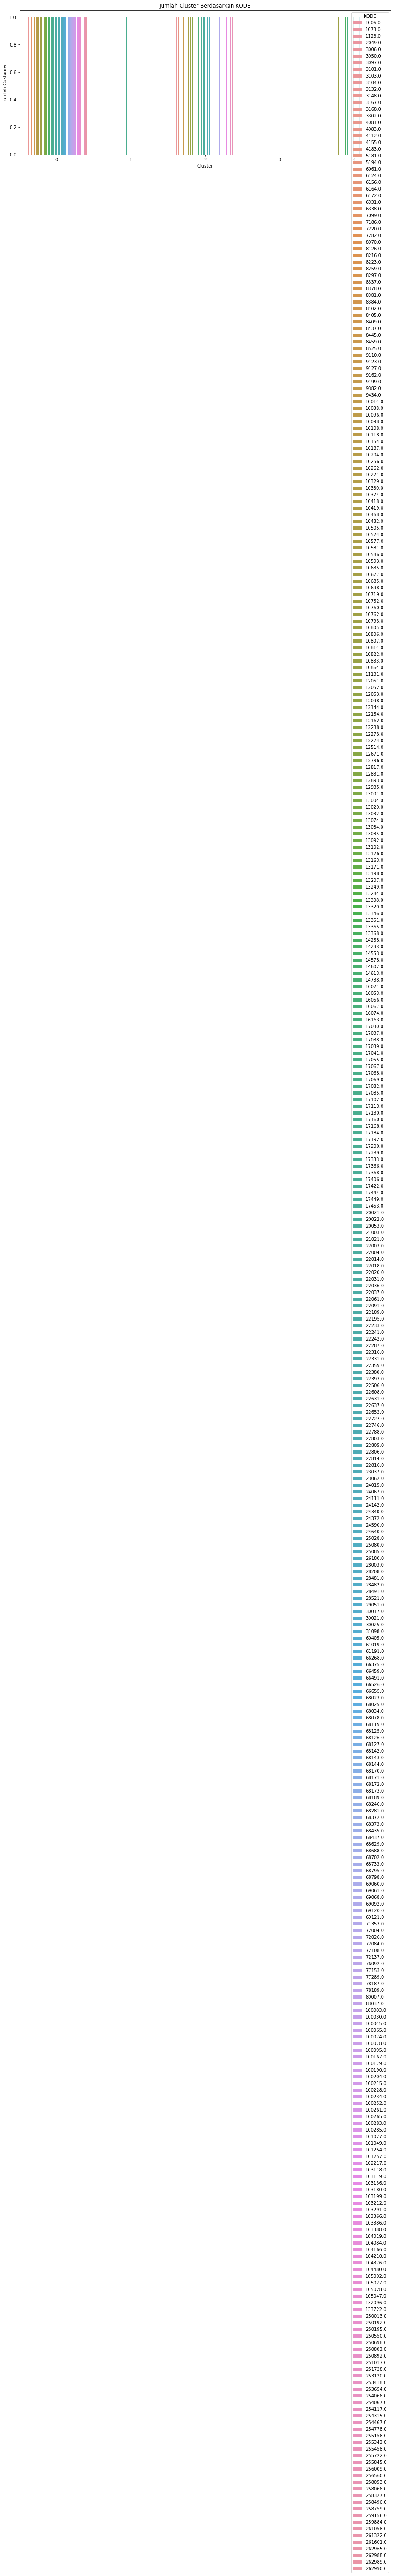

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="segment", data=results, hue="KODE")
plt.title("Jumlah Cluster Berdasarkan KODE")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

In [ ]:
customer.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'business_id', 'business_created_at',
       'business_category', 'trans_id', 'trans_date', 'report_type', 'amount',
       'product_name', 'price', 'transaction_quantity', 'Location', 'Revenue',
       'amount_stand'],
      dtype='object')

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="segment", data=results, hue="Revenue")
plt.title("Cluster Berdasarkan Revenue")
plt.xlabel("Cluster")
plt.ylabel("Customer")
plt.show()

KeyboardInterrupt: ignored

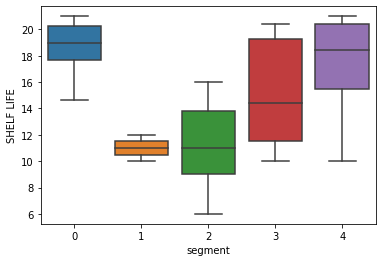

In [ ]:
sns.boxplot(x=results["segment"], y=results["SHELF LIFE"], data=results)

In [ ]:
data_produk_qty_highest

,,KODE,QTY,HARGA,DISC (%),DISC (Rp),SHELF LIFE
KODE,NAMA,,,,,,
17130,INDOMI KARI AYAM,17130.0,40.000000,935.0,0.0,0.0,10.000000
12053,ALPENLI-LOLLI STRAWB,12053.0,30.000000,390.0,0.0,0.0,12.000000
17406,SELERA RAK.BASO,17406.0,15.500000,500.0,0.0,0.0,21.000000
10577,MIO MIO STICK 18 GR,10577.0,10.666667,445.0,0.0,0.0,15.666667
8384,POCI BIRU 40/KCL,8384.0,10.000000,1190.0,0.0,0.0,10.000000
...,...,...,...,...,...,...,...
100252,SURF 40x6's LIME FRS,100252.0,1.400000,2370.0,0.0,0.0,19.400000
68629,DREAM HNY SOAP 80,68629.0,1.400000,1765.0,0.0,0.0,20.000000
3006,DANCOW INST BOX 200,3006.0,1.400000,9160.0,0.0,0.0,18.800000


In [ ]:
customer.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'business_id', 'business_created_at',
       'business_category', 'trans_id', 'trans_date', 'report_type', 'amount',
       'product_name', 'price', 'transaction_quantity', 'Location', 'Revenue',
       'amount_stand'],
      dtype='object')

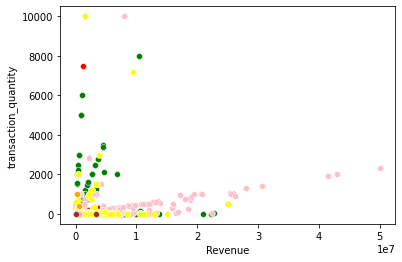

In [ ]:
# Plot customer berdasarkan usia dengan menggunakan scatter plot
sns.scatterplot(x=results[results["segment"]==0].Revenue, y=results[results["segment"]==0].transaction_quantity , color="red")
sns.scatterplot(x=results[results["segment"]==1].Revenue, y=results[results["segment"]==1].transaction_quantity, color="green")
sns.scatterplot(x=results[results["segment"]==2].Revenue, y=results[results["segment"]==2].transaction_quantity, color="pink")
sns.scatterplot(x=results[results["segment"]==3].Revenue, y=results[results["segment"]==3].transaction_quantity, color="blue")
sns.scatterplot(x=results[results["segment"]==4].Revenue, y=results[results["segment"]==4].transaction_quantity, color="yellow")
sns.scatterplot(x=results[results["segment"]==5].Revenue, y=results[results["segment"]==5].transaction_quantity, color="black")
sns.scatterplot(x=results[results["segment"]==6].Revenue, y=results[results["segment"]==6].transaction_quantity, color="orange")
sns.scatterplot(x=results[results["segment"]==7].Revenue, y=results[results["segment"]==7].transaction_quantity, color="gray")
sns.scatterplot(x=results[results["segment"]==8].Revenue, y=results[results["segment"]==8].transaction_quantity, color="brown")

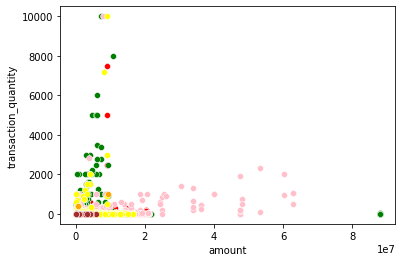

In [ ]:
# Plot customer berdasarkan usia dengan menggunakan scatter plot
sns.scatterplot(x=results[results["segment"]==0].amount, y=results[results["segment"]==0].transaction_quantity , color="red")
sns.scatterplot(x=results[results["segment"]==1].amount, y=results[results["segment"]==1].transaction_quantity, color="green")
sns.scatterplot(x=results[results["segment"]==2].amount, y=results[results["segment"]==2].transaction_quantity, color="pink")
sns.scatterplot(x=results[results["segment"]==3].amount, y=results[results["segment"]==3].transaction_quantity, color="blue")
sns.scatterplot(x=results[results["segment"]==4].amount, y=results[results["segment"]==4].transaction_quantity, color="yellow")
sns.scatterplot(x=results[results["segment"]==5].amount, y=results[results["segment"]==5].transaction_quantity, color="black")
sns.scatterplot(x=results[results["segment"]==6].amount, y=results[results["segment"]==6].transaction_quantity, color="orange")
sns.scatterplot(x=results[results["segment"]==7].amount, y=results[results["segment"]==7].transaction_quantity, color="gray")
sns.scatterplot(x=results[results["segment"]==8].amount, y=results[results["segment"]==8].transaction_quantity, color="brown")